# Contexto

Opendata AIG Brazil

A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro.

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG). São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).

Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo Painel SIPAER disponível na página do CENIPA.

Dados proveniente dos Programas de Gerenciamento de Prevenção administrados pelo CENIPA (Emissão de Raio Laser e Risco Baloeiro) não constam nesta base. Esses programas possuem formulários próprios para coleta de dados com foco exclusivo para gerenciamento do risco, enquanto os dados coletados pelo formulário CENIPA-05 têm foco principal na investigação de acidentes (AIG).
Tabelas (arquivos)

    OCORRÊNCIA.csv - Informações sobre as ocorrências.
    OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
    AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
    FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
    RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.
    Fonte: Sistema DÉDALO.

- Fonte 	http://www.fab.mil.br/cenipa/
- Autor 	Centro de Investigação e Prevenção de Acidentes Aeronáuticos
- Última Atualização 	5 de Outubro de 2021, 19:19 (UTC-03:00)
- Cobertura geográfica 	Brasil
- Cobertura temporal 	2010 a 2019
- Frequência de atualização 	Anual
- Granularidade geográfica 	Aeródromo
- Granularidade temporal 	Hora:Minuto

**40 Colunas Categoricas:**

- ocorrencia_classificacao                 category
- ocorrencia_latitude                      category
- ocorrencia_longitude                     category
- ocorrencia_cidade                        category
- ocorrencia_uf                            category
- ocorrencia_pais                          category
- ocorrencia_aerodromo                     category
- ocorrencia_hora                          category
- investigacao_aeronave_liberada           category
- investigacao_status                      category
- divulgacao_relatorio_publicado           category
- divulgacao_dia_publicacao                category
- ocorrencia_saida_pista                   category
- ocorrencia_tipo                          category
- ocorrencia_tipo_categoria                category
- taxonomia_tipo_icao                      category
- aeronave_matricula                       category
- aeronave_operador_categoria              category
- aeronave_tipo_veiculo                    category
- aeronave_fabricante                      category
- aeronave_modelo                          category
- aeronave_tipo_icao                       category
- aeronave_motor_tipo                      category
- aeronave_motor_quantidade                category
- aeronave_pais_fabricante                 category
- aeronave_pais_registro                   category
- aeronave_registro_categoria              category
- aeronave_registro_segmento               category
- aeronave_voo_origem                      category
- aeronave_voo_destino                     category
- aeronave_fase_operacao                   category
- aeronave_tipo_operacao                   category
- aeronave_nivel_dano                      category
- fator_nome                               category
- fator_aspecto                            category
- fator_condicionante                      category
- fator_area                               category
- recomendacao_conteudo                    category
- recomendacao_status                      category
- recomendacao_destinatario                category

**07 Colunas numéricas:**

- total_recomendacoes                         int32
- total_aeronaves_envolvidas                  int32
- aeronave_pmd                                int32
- aeronave_pmd_categoria                      int32
- aeronave_assentos                           int32
- aeronave_ano_fabricacao                   : Faz quantos anos que foi fabricado
- aeronave_fatalidades_total                  int32



**04 Colunas de data/hora:**
- ocorrencia_dia                     datetime64[ns]
- ocorrencia_hora                          category
- recomendacao_dia_assinatura                object
- recomendacao_dia_encaminhamento            object

## Tabela Relacionamento

<img src="http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/modelo_dados.png" width="700 px">

# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import math

from matplotlib            import pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None

from IPython.core.display  import HTML


import seaborn as sns

In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

## 0.1. Helper Functions

## 0.2. Loading data

In [2]:
ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


In [3]:
#merge
aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )



In [4]:
df_raw.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17646 entries, 0 to 17645
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   codigo_ocorrencia                17646 non-null  int64  
 1   codigo_ocorrencia1               17646 non-null  int64  
 2   codigo_ocorrencia2               17646 non-null  int64  
 3   codigo_ocorrencia3               17646 non-null  int64  
 4   codigo_ocorrencia4               17646 non-null  int64  
 5   ocorrencia_classificacao         17646 non-null  object 
 6   ocorrencia_latitude              16065 non-null  object 
 7   ocorrencia_longitude             16065 non-null  object 
 8   ocorrencia_cidade                17646 non-null  object 
 9   ocorrencia_uf                    17646 non-null  object 
 10  ocorrencia_pais                  17646 non-null  object 
 11  ocorrencia_aerodromo             17646 non-null  object 
 12  ocorrencia_dia    

<ipython-input-4-7128da69681d>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_raw.info(null_counts=True)


In [5]:
#df_raw.to_csv('./data/ocorrencias_aeronauticas_raw.csv', index=False)

In [6]:
df_raw = pd.read_csv('./data/ocorrencias_aeronauticas_raw.csv')

In [7]:
with pd.option_context('display.max_rows', 10):
    print(df_raw)

       codigo_ocorrencia  codigo_ocorrencia1  codigo_ocorrencia2  \
0                  40211               40211               40211   
1                  40349               40349               40349   
2                  40351               40351               40351   
3                  39527               39527               39527   
4                  39527               39527               39527   
...                  ...                 ...                 ...   
17641              80245               80245               80245   
17642              80247               80247               80247   
17643              80251               80251               80251   
17644              80257               80257               80257   
17645              80259               80259               80259   

       codigo_ocorrencia3  codigo_ocorrencia4 ocorrencia_classificacao  \
0                   40211               40211                INCIDENTE   
1                   40349          

# 1.0.  DESCRICAO DOS DADOS

In [8]:
df1 = df_raw.copy()

## 1.1. Rename Columns

## 1.2. Data Dimensions

In [9]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 17646
Number of Cols: 59


In [10]:
# check raw data main infos
df1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17646 entries, 0 to 17645
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   codigo_ocorrencia                17646 non-null  int64  
 1   codigo_ocorrencia1               17646 non-null  int64  
 2   codigo_ocorrencia2               17646 non-null  int64  
 3   codigo_ocorrencia3               17646 non-null  int64  
 4   codigo_ocorrencia4               17646 non-null  int64  
 5   ocorrencia_classificacao         17646 non-null  object 
 6   ocorrencia_latitude              16065 non-null  object 
 7   ocorrencia_longitude             16065 non-null  object 
 8   ocorrencia_cidade                17646 non-null  object 
 9   ocorrencia_uf                    17646 non-null  object 
 10  ocorrencia_pais                  17646 non-null  object 
 11  ocorrencia_aerodromo             17646 non-null  object 
 12  ocorrencia_dia    

<ipython-input-10-6769e3449d77>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df1.info(null_counts=True)


## 1.3. Data Types

### Alterando os tipos dos dados para facilitar a manipulação de dados e reduzir o uso de recursos computacionais

In [11]:
df1.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia1                   int64
codigo_ocorrencia2                   int64
codigo_ocorrencia3                   int64
codigo_ocorrencia4                   int64
ocorrencia_classificacao            object
ocorrencia_latitude                 object
ocorrencia_longitude                object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_pais                     object
ocorrencia_aerodromo                object
ocorrencia_dia                      object
ocorrencia_hora                     object
investigacao_aeronave_liberada      object
investigacao_status                 object
divulgacao_relatorio_numero         object
divulgacao_relatorio_publicado      object
divulgacao_dia_publicacao           object
total_recomendacoes                  int64
total_aeronaves_envolvidas           int64
ocorrencia_saida_pista              object
ocorrencia_tipo                     object
ocorrencia_

In [12]:
#ocorrencia_dia - mudar para datetime 
df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')
df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%Y-%m-%d')


# recomendacao_dia_encaminhamento - 0 se dia for data com má formato 
df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: 0 if ((x == '0002-11-29') or( x =='0002-11-24')or (x == '0002-11-17') or (x == '0002-11-27') or (x == '0002-11-26')) else x )
df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


#recomendacao_dia_feedback
df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply(lambda x: 0 if ((x == '0000-00-00') or (x == '0002-11-29') or (x == '0002-11-21') or (x == '0002-11-23')) else x)
df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

#recomendacao_dia_assinatura
df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')

In [13]:
# convertendo os dados numéricos
for c in df1.select_dtypes( include=['int64'] ):
    df1[c] = df1[c].astype('int32')
    
# 36  aeronave_ano_fabricacao          17414 non-null  float64
df1['aeronave_ano_fabricacao'] = df1['aeronave_fatalidades_total'].astype('int32')

In [14]:
# 35  aeronave_assentos                17646 non-null  int32  
# aeronave_assentos - 0 para na - lidarei com os na mais tarde
df1['aeronave_assentos'].fillna(0, inplace=True )
df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

In [15]:
# convertendo os dados categóricos
for c in df1.select_dtypes( include=['object'] ):
    df1[c] = df1[c].astype('category')

In [16]:
df1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17646 entries, 0 to 17645
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   codigo_ocorrencia                17646 non-null  int32         
 1   codigo_ocorrencia1               17646 non-null  int32         
 2   codigo_ocorrencia2               17646 non-null  int32         
 3   codigo_ocorrencia3               17646 non-null  int32         
 4   codigo_ocorrencia4               17646 non-null  int32         
 5   ocorrencia_classificacao         17646 non-null  category      
 6   ocorrencia_latitude              16065 non-null  category      
 7   ocorrencia_longitude             16065 non-null  category      
 8   ocorrencia_cidade                17646 non-null  category      
 9   ocorrencia_uf                    17646 non-null  category      
 10  ocorrencia_pais                  17646 non-null  category 

## 1.4 Drop Columns

### Excluindo as colunas duplicadas ou com informações pouco importantes para insights 

**Suposição**: não é um relatório de follow up (data que entregou, 'recomendacao_dia_feedback', etc) mas do conteúdo/informações apresentadas , recomendacao_destinatario_sigla : mesma info que recomendacao_destinatario
- 'aeronave_pmd', 'aeronave_pmd_categoria' : supondo que seja indice somente

In [17]:
df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4','divulgacao_relatorio_numero', 'ocorrencia_pais', 'recomendacao_numero', 'recomendacao_dia_feedback' , 'recomendacao_destinatario_sigla', 'aeronave_matricula', 'aeronave_pmd', 'aeronave_pmd_categoria'], axis=1, inplace=True)

In [18]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 17646
Number of Cols: 46


## 1.4. Check NA

In [19]:
df1.isna().sum()

ocorrencia_classificacao              0
ocorrencia_latitude                1581
ocorrencia_longitude               1581
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_aerodromo                  0
ocorrencia_dia                        0
ocorrencia_hora                       1
investigacao_aeronave_liberada     1952
investigacao_status                 354
divulgacao_relatorio_publicado        0
divulgacao_dia_publicacao          4740
total_recomendacoes                   0
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_tipo                       0
ocorrencia_tipo_categoria             0
taxonomia_tipo_icao                   0
aeronave_operador_categoria           0
aeronave_tipo_veiculo                 0
aeronave_fabricante                   0
aeronave_modelo                       0
aeronave_tipo_icao                    0
aeronave_motor_tipo                   3
aeronave_motor_quantidade             0


## 1.5  Fill Out NA

In [20]:
#correncia_latitude  como todas com na tem 'ocorrencia_cidade', colocar 0 para manter as linhas
df1['ocorrencia_latitude'] = df1['ocorrencia_latitude'].cat.add_categories("0").fillna("0")

#ocorrencia_longitude                1581
df1['ocorrencia_longitude'] = df1['ocorrencia_longitude'].cat.add_categories("0").fillna("0")

#ocorrencia_hora       drop
df1.dropna(subset =['ocorrencia_hora'], inplace=True)

#investigacao_aeronave_liberada - Suposições:
## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
# NAO se divulgacao_relatorio_publicado == NAO 
# os na´s que sobreram drop =647 
df1.loc[ (df1['investigacao_aeronave_liberada'].isna()) & (df1['investigacao_status']== 'FINALIZADA') & (df1['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
df1.loc[ ( df1['investigacao_aeronave_liberada'].isna() ) & ( df1.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
df1.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)


#investigacao_status                  354   
df1.dropna(subset =['investigacao_status'], inplace=True)


#divulgacao_dia_publicacao           4740  destes     4385 NÃO tem relatorio publicado , data - 0 
df1['divulgacao_dia_publicacao'] = df1['divulgacao_dia_publicacao'].cat.add_categories("0").fillna("0")

#aeronave_voo_origem                    1
df1.dropna(subset =['aeronave_voo_origem'], inplace=True)

# aeronave_motor_tipo
df1.dropna(subset =['aeronave_motor_tipo'], inplace=True)

## 4799  ou 28% do db como o obj. criei cat 'não informado' -para relatório ok                        
df1['fator_nome'] = df1['fator_nome'].cat.add_categories("não informado").fillna("não informado")                     
df1['fator_aspecto'] = df1['fator_aspecto'].cat.add_categories("não informado").fillna("não informado")
df1['fator_condicionante'] = df1['fator_condicionante'].cat.add_categories("não informado").fillna("não informado")
df1['fator_area'] = df1['fator_area'].cat.add_categories("não informado").fillna("não informado")

# recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
df1.loc[ df1['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df1.loc[ df1['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

# para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
#recomendacao_dia_encaminhamento    5698
# não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
df1.loc[df1['recomendacao_dia_encaminhamento'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0
df1['recomendacao_dia_encaminhamento'].fillna(0, inplace=True )


# set categoria
df1['recomendacao_conteudo'] = df1['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

# recomendacao_conteudo
df1.loc[df1['recomendacao_conteudo'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
# o restante vou dropar 
df1.dropna(subset =['recomendacao_conteudo'], inplace=True)

# recomendacao_conteudo
df1.loc[df1['recomendacao_status'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_status'] = "***"
df1.dropna(subset =['recomendacao_status'], inplace=True)


#set categoria
df1['recomendacao_destinatario'] = df1['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
# recomendacao_destinatario
df1.loc[df1['recomendacao_destinatario'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

In [21]:
#df1.to_csv('./data/ocorrencias_aeronauticas_cleaned.csv', index=False)

In [22]:
#df_cleaned = pd.read_csv('./data/ocorrencias_aeronauticas_cleaned.csv')

In [23]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 15287
Number of Cols: 46


*** Tentei diminuir o mínimo de linhas possíveis por não saber o objetivo que serão usadas as informações ***

## 1.6 Descriptive Statistics

In [24]:
num_attributes = df1.select_dtypes( include=['int32', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int32', 'float64', 'datetime64[ns]'] )


cat_attributes.drop(['recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'divulgacao_dia_publicacao'], axis=1, inplace=True)

C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 1.6.1. Numerical Attributes

In [25]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,total_recomendacoes,0.0,23.0,23.0,4.582129,3.0,5.687167,1.737442,2.505605
1,total_aeronaves_envolvidas,1.0,3.0,2.0,1.039772,1.0,0.198414,4.935046,23.789335
2,aeronave_assentos,0.0,384.0,384.0,23.352783,6.0,51.541480,3.270078,11.793562
3,aeronave_ano_fabricacao,0.0,16.0,16.0,1.064434,0.0,2.941989,3.871704,15.747954
4,aeronave_fatalidades_total,0.0,16.0,16.0,1.064434,0.0,2.941989,3.871704,15.747954


- Total_recomendações: grande range, skew deslocado para a esquerda, maioria valores baixos, confirmado pela mediana
- total_aeronaves_envolvidas = maioria 1 (media e mediana próximas)
- aeronave_assentos: maioria com 6 assentos, skew  grande 
- aeronave_ano_fabricacao: maioria 0, concentração de valores menores
-aeronave_fatalidades_total = maioria sem fatalidades

### 1.6.2 Categorical Attributes

In [26]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

ocorrencia_classificacao             3
ocorrencia_latitude               2014
ocorrencia_longitude              2008
ocorrencia_cidade                  881
ocorrencia_uf                       28
ocorrencia_aerodromo               421
ocorrencia_hora                    949
investigacao_aeronave_liberada       3
investigacao_status                  2
divulgacao_relatorio_publicado       2
ocorrencia_saida_pista               2
ocorrencia_tipo                     80
ocorrencia_tipo_categoria           80
taxonomia_tipo_icao                 31
aeronave_operador_categoria         12
aeronave_tipo_veiculo                9
aeronave_fabricante                161
aeronave_modelo                    632
aeronave_tipo_icao                 225
aeronave_motor_tipo                  6
aeronave_motor_quantidade            6
aeronave_pais_fabricante            24
aeronave_pais_registro              24
aeronave_registro_categoria          9
aeronave_registro_segmento          13
aeronave_voo_origem      

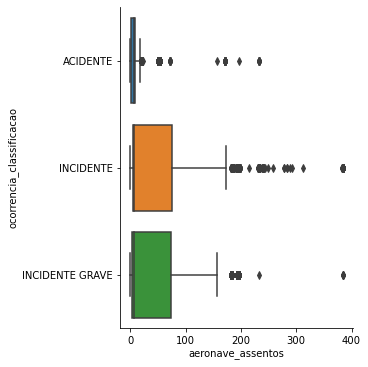

In [27]:
sns.catplot(data=df1, x="aeronave_assentos", y="ocorrencia_classificacao", kind="box");

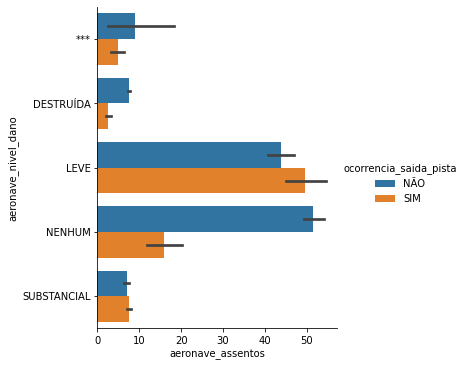

In [28]:
#ocorrencia_classificacao 
sns.catplot(data=df1, x="aeronave_assentos", y="aeronave_nivel_dano", hue="ocorrencia_saida_pista", kind="bar");

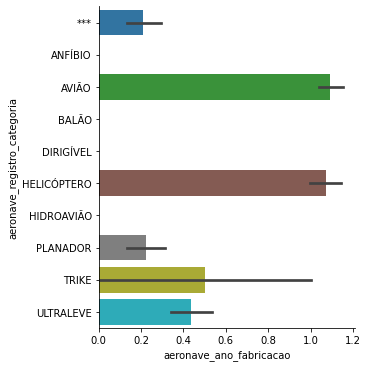

In [29]:
sns.catplot(data=df1, y="aeronave_registro_categoria", x="aeronave_ano_fabricacao" , kind="bar");


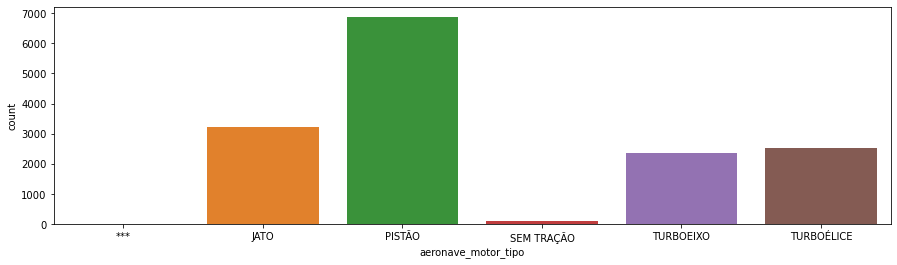

In [58]:
aux = df1.loc[df1.aeronave_motor_tipo != ("***"), :]
fig = plt.subplots(figsize = (15,4))
sns.countplot(x = 'aeronave_motor_tipo', data = aux);

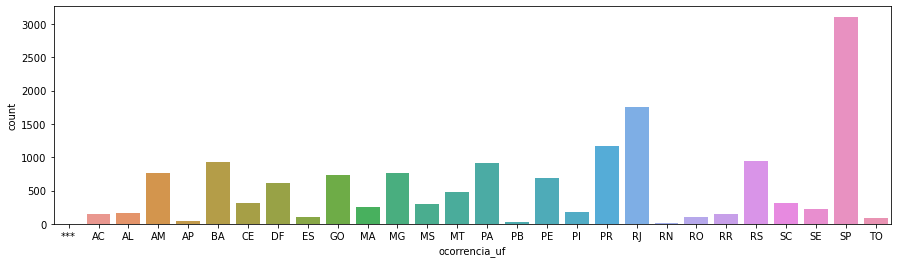

In [62]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='ocorrencia_uf', data = df1);

In [61]:
df1.ocorrencia_uf.value_counts()

SP     3107
RJ     1754
PR     1173
RS      946
BA      925
PA      915
MG      767
AM      757
GO      735
PE      689
DF      619
MT      481
SC      311
CE      309
MS      300
MA      249
SE      221
PI      181
AL      161
AC      155
RR      154
ES      101
RO      101
TO       93
AP       37
PB       33
RN       12
***       1
Name: ocorrencia_uf, dtype: int64

In [31]:
#ocorrencia_classificacao             3
#
#ocorrencia_uf                       28
#
#ocorrencia_saida_pista               2
#ocorrencia_tipo_categoria           80
#taxonomia_tipo_icao   - 31 
#aeronave_operador_categoria         12
#aeronave_tipo_veiculo                9
#aeronave_fabricante                161
#
#aeronave_motor_tipo                  6
#
#
#
#aeronave_registro_categoria          9
#aeronave_registro_segmento          13
#
#aeronave_fase_operacao              32
#aeronave_tipo_operacao              10
#aeronave_nivel_dano                  5
#
#fator_aspecto                       13 #tira o nao informado , ***
#fator_condicionante                  8 # tira o não informado e ***
#fator_area                           6 # tira o não informado e ***
#
#recomendacao_status                  5 # tira ***
#
##Feature engineering
## Só sim e não
#divulgacao_relatorio_publicado -só tem sim e não  
#ocorrencia_saida_pista


In [32]:
## Drop columns
# investigacao_aeronave_liberada só 3 colunas que SIM    12360 ***     2767 NÃO      160 não diz nada
# aeronave_motor_quantidade            6 valores parecidos não diz nada


# aeronave_modelo                    632 ?? rever


## Menor ideia do que seja
#taxonomia_tipo_icao                 31 um monte de siglas


##Parecidas
#ocorrencia_tipo                     80
#ocorrencia_tipo_categoria           80

# primeiras impressões
# aeronave_pais_fabricante            24 ***maioria brasileira, mas os dados são do Brasil
# aeronave_pais_registro              24 igual o que cima

# conclusões legais
#aeronave_voo_origem                558
#aeronave_voo_destino               561
#fator_nome                          71  muito geral quem sabe um NLP
# recomendacao_conteudo     muito geral quem sabe um NLP

# feature engeniiring
# fator_aspecto                       13 #mudar *** para não informado

# Todos os fatores_ tem que ser suposto que não houve a divulgação do relatório ainda

#Grafico ideia 
#recomendacao_destinatario           86 # tira NA - relatório Não publicado e value_counts maior que x

<ipython-input-33-f6a8f98392e2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aux = df1[(df1["aeronave_motor_tipo"] != "***" ) & (df1["aeronave_registro_categoria"] != "***" ) & (df1["aeronave_registro_categoria"].value_counts() > 5 ) ]


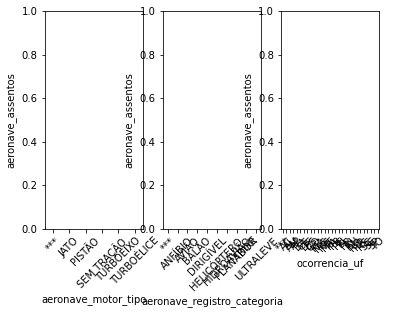

In [33]:
aux = df1[(df1["aeronave_motor_tipo"] != "***" ) & (df1["aeronave_registro_categoria"] != "***" ) & (df1["aeronave_registro_categoria"].value_counts() > 5 ) ]

plt.subplot( 1, 3, 1 )
a1 = sns.boxplot( x='aeronave_motor_tipo', y='aeronave_assentos', data=aux )
plt.setp(a1.get_xticklabels(), rotation=45)

plt.subplot( 1, 3, 2 )
a = sns.boxplot( x='aeronave_registro_categoria', y='aeronave_assentos',  data=aux )
plt.setp(a.get_xticklabels(), rotation=45)

plt.subplot( 1, 3, 3 )
a3 =sns.boxplot( x='ocorrencia_uf', y='aeronave_assentos', data=aux );
plt.setp(a3.get_xticklabels(), rotation=45);


<AxesSubplot:xlabel='aeronave_assentos', ylabel='Count'>

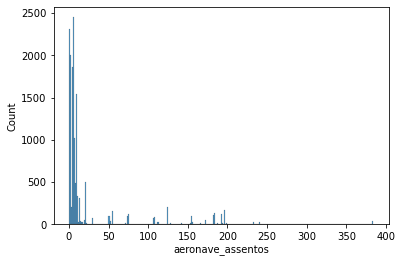

In [34]:

sns.histplot(data=num_attributes, x="aeronave_assentos", bins=300)